In [1]:
% load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [7]:
import numpy as np

In [8]:
from oracles import create_log_reg_oracle, grad_finite_diff, hess_finite_diff, QuadraticOracle

In [9]:
A = np.random.normal(size=(5, 2))
b = np.random.choice([-1, 1], size=(5,))

In [10]:
oracle = create_log_reg_oracle(A, b, 0.5)

In [11]:
x = np.array([0.5, 0.5])
x2 = np.array([100.5, -2.5])
oracle.grad(x), oracle.hess(x)

(array([-0.02155011,  0.36898774]),
 array([[ 0.66364064, -0.07656552],
        [-0.07656552,  0.62563608]]))

In [12]:
grad_finite_diff(oracle.func, x), hess_finite_diff(oracle.func, x)

(array([-0.02155011,  0.36898774]),
 array([[ 0.66364025, -0.07656653],
        [-0.07656653,  0.6256351 ]]))

In [13]:
np.allclose(oracle.grad(x), grad_finite_diff(oracle.func, x))

True

In [14]:
np.allclose(oracle.grad(x2), grad_finite_diff(oracle.func, x2), atol=1e-4)

True

In [15]:
np.allclose(oracle.hess(x), hess_finite_diff(oracle.func, x), atol=1e-4)

True

In [16]:
np.allclose(oracle.hess(x2), hess_finite_diff(oracle.func, x2), atol=1e-2)

False

In [17]:
from optimization import newton, gradient_descent

In [18]:
oracle = QuadraticOracle(np.eye(5), np.arange(5))
print(oracle.func(np.array([0, 1, 2, 3, 4])))
x_opt, message, history = newton(oracle, np.zeros(5),
                                 line_search_options={'method': 'Wolfe', 'c1': 1e-4})

print('Found optimal point: {}, {}'.format(x_opt, message))

-15.0
Found optimal point: [0. 1. 2. 3. 4.], success


In [19]:
A = np.eye(2) * 2
b = np.array([2., 2.])
oracle = QuadraticOracle(A, b)
print(oracle.func(np.array([1, 1])))
# print(oracle.grad([0.5, 0.5]))
# print(oracle.hess([0.5, 0.5]))
ls = {'method': 'Armijo', 'c1': 1e-4}
newton(oracle, np.array([5, 5]), line_search_options=ls, trace=True)

-2.0


(array([1., 1.]),
 'success',
 defaultdict(list,
             {'time': [5.698204040527344e-05, 0.0017428398132324219],
              'func': [30.0, -2.0],
              'grad_norm': [128.0, 6.310887241768095e-30],
              'x': [array([5, 5]), array([1., 1.])],
              'norm_to_start': [1.0, 4.930380657631324e-32]}))

In [20]:
newton(oracle, np.zeros(2), line_search_options={'method': 'Wolfe', 'c1': 1e-4}, trace=True)

(array([1., 1.]),
 'success',
 defaultdict(list,
             {'time': [8.416175842285156e-05, 0.00027108192443847656],
              'func': [0.0, -2.0],
              'grad_norm': [8.0, 3.944304526105059e-31],
              'x': [array([0., 0.]), array([1., 1.])],
              'norm_to_start': [1.0, 4.930380657631324e-32]}))

# Эксперимент 1: Траектория градиентного спуска на квадратичной функ- ции


In [21]:
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


## Обусловленность

In [412]:
A = np.array([
    [3.5, 0],
    [0, 1.5]
])
b = np.array([0, 0])
oracle = QuadraticOracle(A, b)

In [413]:
def plot_everything(oracle, hists, ls, xrange=None, yrange=None):
    n = len(hists)
    plot_levels(oracle.func, xrange=xrange, yrange=yrange)
    for i in range(n):
        plot_trajectory(oracle.func, hists[i]['x'], label=f"{ls[i]['method']}", fit_axis=False, c=i)

    plt.legend()

In [414]:
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', 'c': 0.1},
]

hists = []
for i in range(3):
    x_opt, status, hist = gradient_descent(oracle, np.array([5, -1]), line_search_options=ls[i], trace=True)
    hists.append(hist)
    print(status)

success
success
success


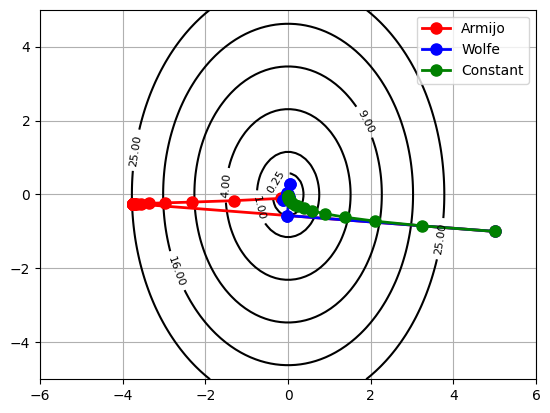

In [415]:
plot_everything(oracle, hists, ls)

In [416]:
A = np.array([
    [3.5, 0],
    [0, 15]
])
b = np.array([0, 0])
oracle = QuadraticOracle(A, b)

In [417]:
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', 'c': 0.1},
]

hists = []
for i in range(3):
    x_opt, status, hist = gradient_descent(oracle, np.array([5, -1]), line_search_options=ls[i], trace=True)
    hists.append(hist)
    print(status)

success
success
success


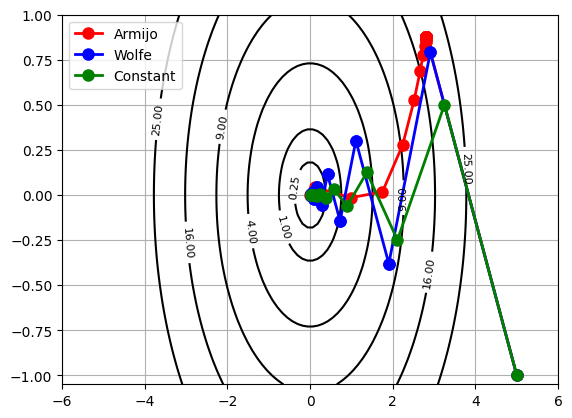

In [418]:
plot_everything(oracle, hists, ls, yrange=(-1.05, 1))

In [435]:
A = np.array([
    [-2, 0],
    [0, 2]
])
b = np.array([0, 0])
oracle = QuadraticOracle(A, b)

In [436]:
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', 'c': 0.1},
]

hists = []
for i in range(3):
    x_opt, status, hist = gradient_descent(oracle, np.array([1, 1]), line_search_options=ls[i], trace=True)
    hists.append(hist)
    print(status)

iterations_exceeded
iterations_exceeded
iterations_exceeded


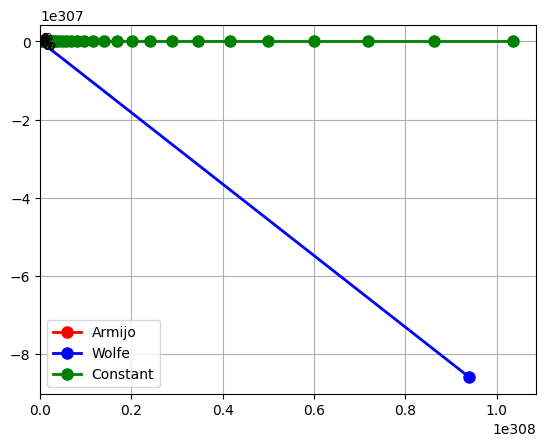

In [437]:
plot_levels(oracle.func, xrange=[-10, 10], yrange=[-10, 10])
plot_everything(oracle, hists, ls, yrange=(-1.05, 1))
plt.grid()

In [438]:
hists = []

for i in range(3):
    x_opt, status, hist = gradient_descent(oracle, np.array([0, 7]), line_search_options=ls[i], trace=True)
    hists.append(hist)
    print(status)

success
success
success


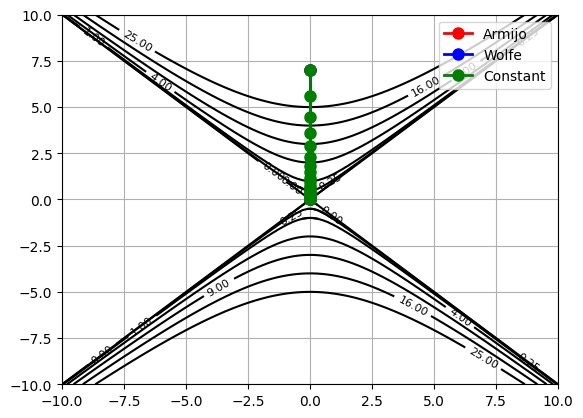

In [439]:
plot_levels(oracle.func, xrange=[-10, 10], yrange=[-10, 10])
plot_everything(oracle, hists, ls, yrange=(-1.05, 1))
plt.grid()

# Эксперимент 2

In [342]:
import matplotlib.patches as mpatches
import tqdm
import scipy
from copy import copy

In [343]:
scale = [100, 1000, 10_000, 100_000]
kappas = [10, 200, 400, 800, 1000]
colors = ['red', 'green', 'blue', 'orange', 'black']

4it [00:07,  1.88s/it]
4it [00:07,  1.86s/it]
4it [00:08,  2.04s/it]
4it [00:07,  1.79s/it]
4it [00:08,  2.13s/it]
4it [00:06,  1.73s/it]
4it [00:07,  1.87s/it]


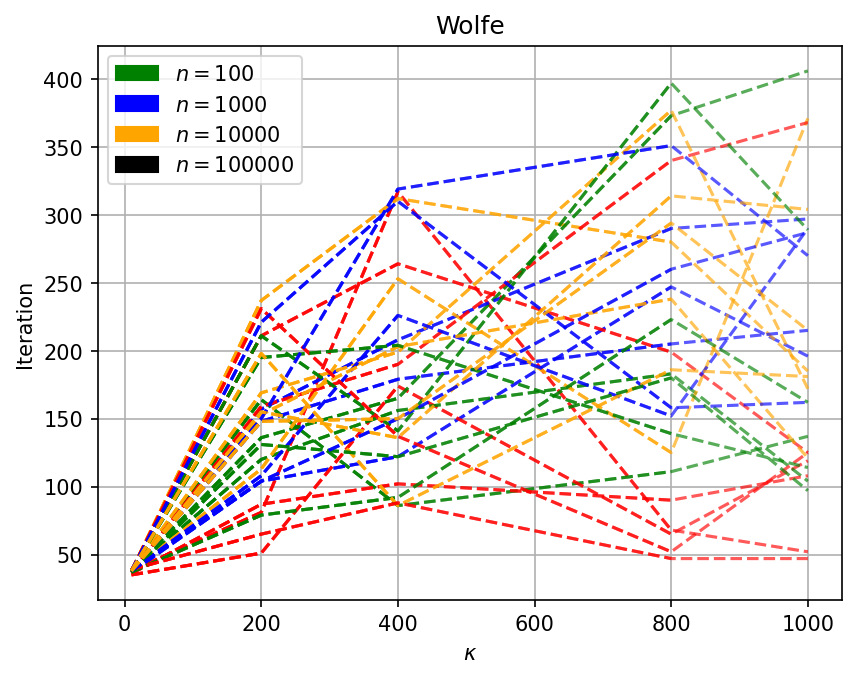

In [345]:
ls = {'method': 'Wolfe'}

green_patch = mpatches.Patch(color='green', label='$n = 100$')
blue_patch = mpatches.Patch(color='blue', label='$n = 1000$')
orange_patch = mpatches.Patch(color='orange', label='$n = 10000$')
black_patch = mpatches.Patch(color='black', label='$n = 100000$')

x = []
y = []
c = []
plt.figure(dpi=150)
for l in range(7):
    for i, n in tqdm.tqdm(enumerate(scale)):
        kappas_x = []
        it_y = []
        color = []
        for k in kappas:
            a = np.random.choice(np.arange(1, k), n, replace=True)
            A = scipy.sparse.diags(a)
            b = np.random.normal(size=(n))
            oracle = QuadraticOracle(A, b)

            _, _, hist = gradient_descent(oracle,
                                          x_0=np.random.uniform(0, k, size=(n)),
                                          tolerance=1e-9,
                                          trace=True,
                                          line_search_options=ls
                                          )
            it_y.append(len(hist['func']))
            kappas_x.append(k)
            color.append(i)

            #             print(colors[i], i)
            plt.plot(kappas_x, it_y, c=colors[i], alpha=0.65, ls='--')

        x.append(copy(kappas_x))
        y.append(copy(it_y))
        c.append(copy(color))

plt.xlabel('$\kappa$')
plt.ylabel('Iteration')
plt.title('Wolfe')
plt.grid()
plt.legend(handles=[green_patch, blue_patch, orange_patch, black_patch])
plt.show()

4it [00:14,  3.71s/it]
4it [00:16,  4.05s/it]
4it [00:11,  3.00s/it]
4it [00:14,  3.60s/it]
4it [00:16,  4.17s/it]
4it [00:14,  3.59s/it]
4it [00:13,  3.41s/it]


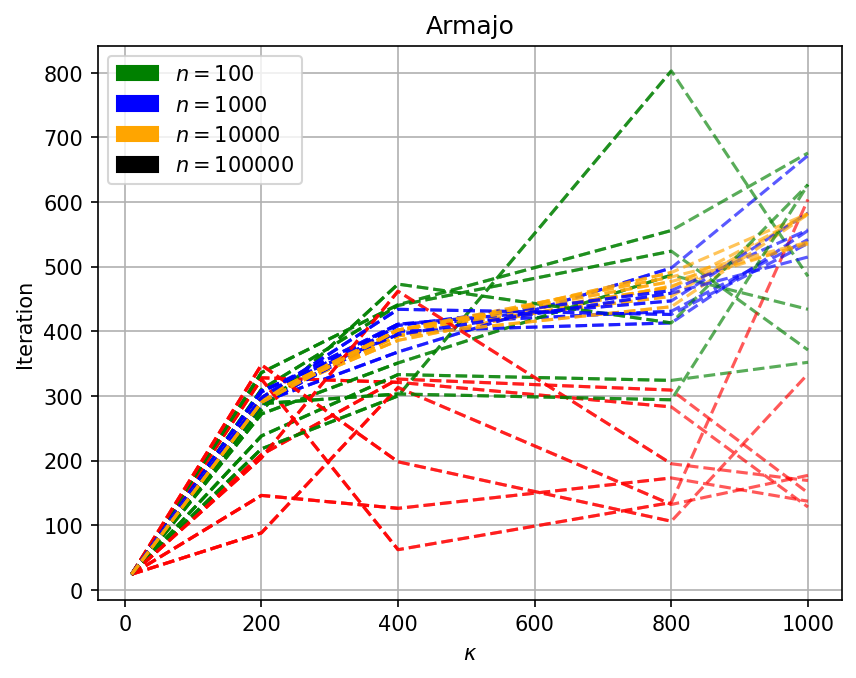

In [347]:
ls = {'method': 'Armijo'}

green_patch = mpatches.Patch(color='green', label='$n = 100$')
blue_patch = mpatches.Patch(color='blue', label='$n = 1000$')
orange_patch = mpatches.Patch(color='orange', label='$n = 10000$')
black_patch = mpatches.Patch(color='black', label='$n = 100000$')

x = []
y = []
c = []
plt.figure(dpi=150)
for l in range(7):
    for i, n in tqdm.tqdm(enumerate(scale)):
        kappas_x = []
        it_y = []
        color = []
        for k in kappas:
            a = np.random.choice(np.arange(1, k), n, replace=True)
            A = scipy.sparse.diags(a)
            b = np.random.normal(size=(n))
            oracle = QuadraticOracle(A, b)

            _, _, hist = gradient_descent(oracle,
                                          x_0=np.random.uniform(0, k, size=(n)),
                                          tolerance=1e-9,
                                          trace=True,
                                          line_search_options=ls
                                          )
            it_y.append(len(hist['func']))
            kappas_x.append(k)
            color.append(i)

            #             print(colors[i], i)
            plt.plot(kappas_x, it_y, c=colors[i], alpha=0.65, ls='--')

        x.append(copy(kappas_x))
        y.append(copy(it_y))
        c.append(copy(color))

plt.xlabel('$\kappa$')
plt.ylabel('Iteration')
plt.title('Armajo')
plt.grid()
plt.legend(handles=[green_patch, blue_patch, orange_patch, black_patch])
plt.show()

# Эксперимент 3

In [19]:
from sklearn.datasets import load_svmlight_file

In [328]:
X, y = load_svmlight_file('./real-sim.bz2')
oracle = create_log_reg_oracle(X, y, regcoef=1 / X.shape[-1])

ls = {'method': 'Armijo'}

x_opt, _, hist_grad = gradient_descent(oracle, x_0=np.zeros(X.shape[1]),
                                       trace=True, line_search_options=ls)
x_opt, _, hist_newton = newton(oracle, x_0=np.zeros(X.shape[1]), trace=True,
                               line_search_options=ls)

In [309]:
def plot_f(hist_grad, hist_newton, dataset_name):
    plt.figure(dpi=150)
    plt.plot(hist_grad['time'], hist_grad['func'], c='orange', label='Gradient Descent')
    plt.plot(hist_newton['time'], hist_newton['func'], c='black', label='Newton')

    plt.grid()
    plt.legend()
    #     plt.ylim(0.15, 0.4)
    #     plt.xlim(-0.15, 3)
    plt.title(f'{dataset_name}')
    plt.xlabel('time, sec.')
    plt.ylabel(r'$f(x)$')


def plot_norm(hist_grad, hist_newton, dataset_name):
    plt.figure(dpi=150)
    plt.plot(hist_grad['time'], np.log(hist_grad['norm_to_start']), c='orange', label='Gradient Descent')
    plt.plot(hist_newton['time'], np.log(hist_newton['norm_to_start']), c='black', label='Newton')

    plt.grid()
    plt.legend()
    # plt.ylim(-0.05, 0.2)
    # plt.xlim(-0.15, 1.5)
    plt.title(f'{dataset_name}')
    plt.xlabel('time, sec.')
    plt.ylabel(r'$\frac{\left\|\nabla f\left(x_k\right)\right\|_2^2}{\left\|\nabla f\left(x_0\right)\right\|_2^2}$')

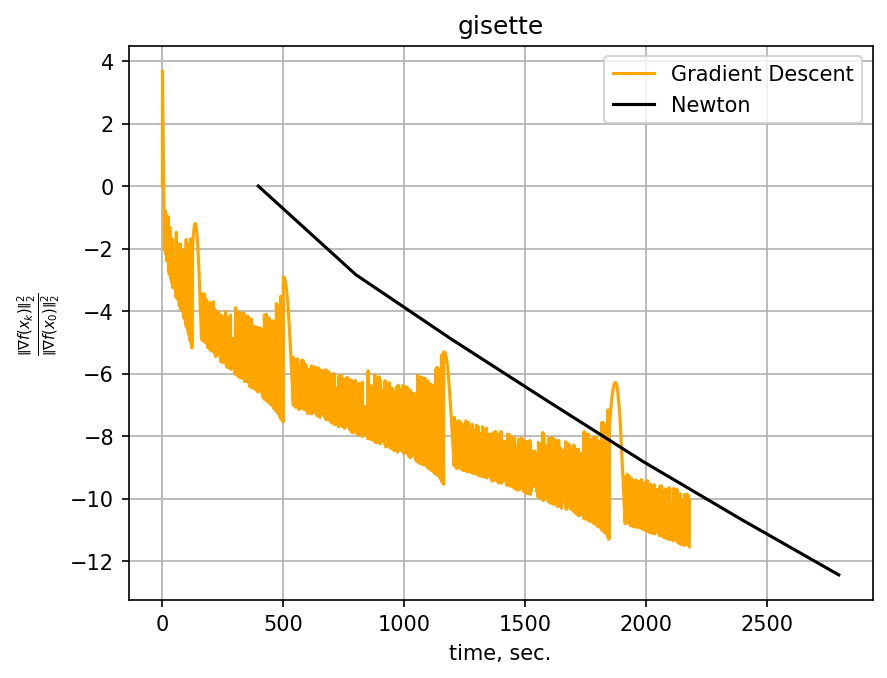

In [326]:
plot_norm(hist_grad, hist_newton, 'gisette')

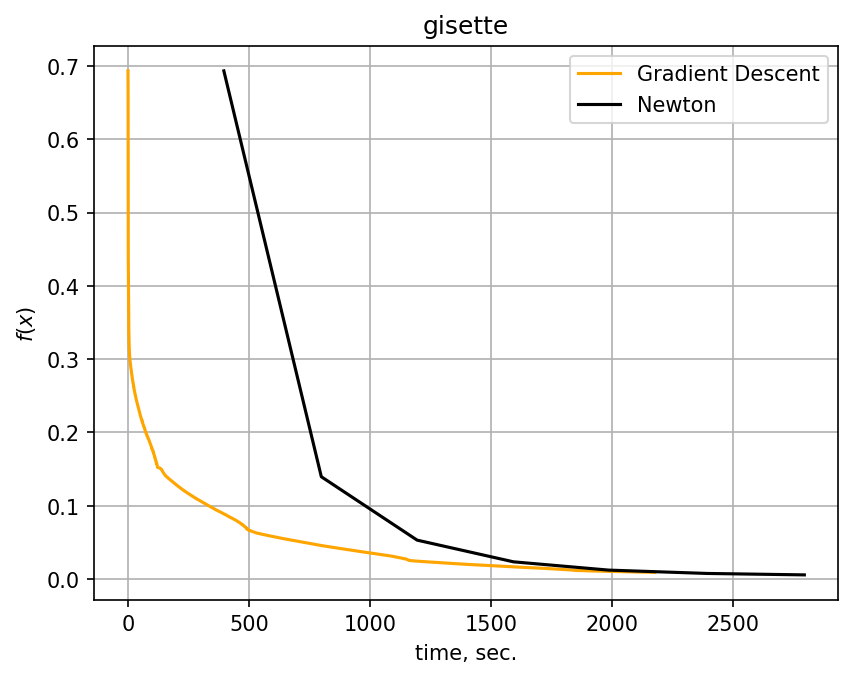

In [327]:
plot_f(hist_grad, hist_newton, 'gisette')

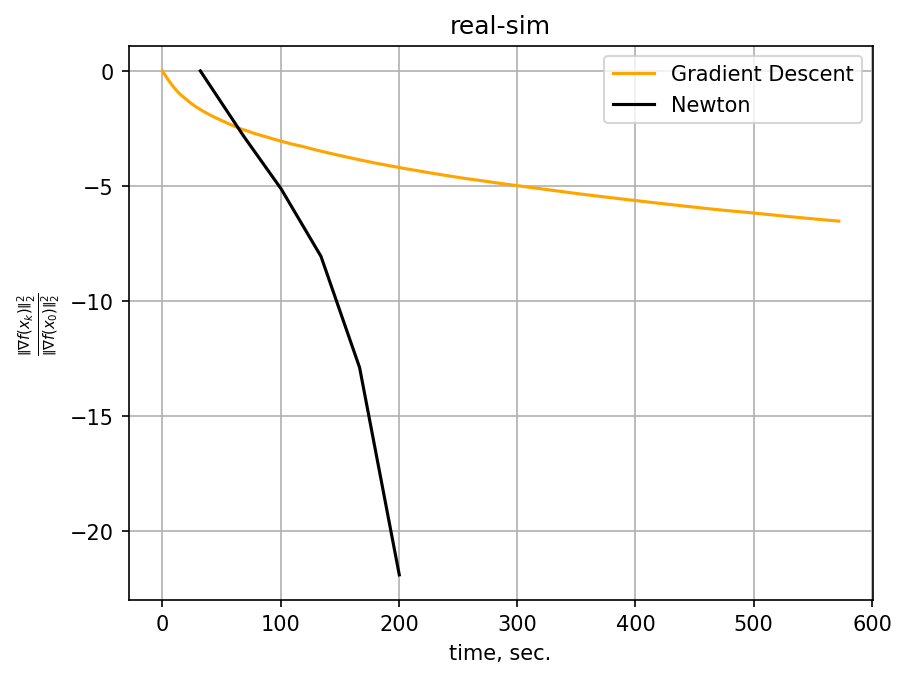

In [315]:
plot_norm(hist_grad, hist_newton, 'real-sim')

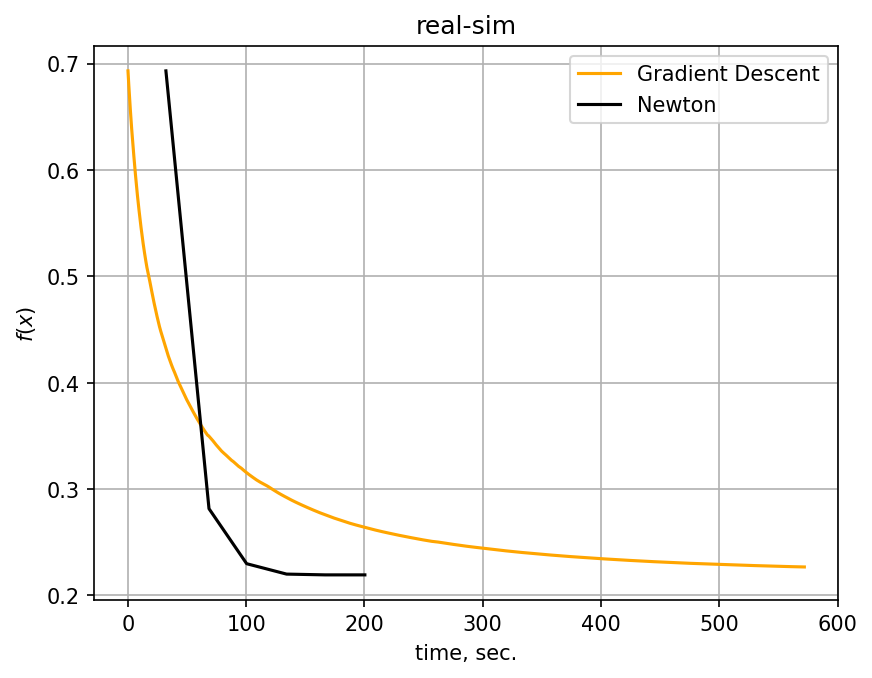

In [316]:
plot_f(hist_grad, hist_newton, 'real-sim')

# Эксперимент 4

In [27]:
grid = [{'method': 'Constant', 'c': 1},
        {'method': 'Constant', 'c': 1e-2},
        {'method': 'Constant', 'c': 1e-3},
        {'method': 'Armijo', 'c1': 1e-2},
        {'method': 'Armijo', 'c1': 1e-3},
        {'method': 'Armijo', 'c1': 1e-4},
        {'method': 'Wolfe', 'c2': 0.9},
        {'method': 'Wolfe', 'c2': 0.5},
        {'method': 'Wolfe', 'c2': 0.2}, ]

In [29]:
A_pos = np.random.normal(1.8, 3.2, size=(2500, 3))
A_neg = np.random.normal(-0.3, 2, size=(2500, 3))
A_lr = np.concatenate([A_pos, A_neg])
y = np.concatenate([[-1] * 2500, [1] * 2500])
oracle_lr = create_log_reg_oracle(A_lr, y, regcoef=1 / 3)

A_quad = np.random.randint(1, 2, size=(5, 5))
A_quad = np.tril(A_quad) + np.tril(A_quad, -1).T
b = np.random.randint(1, 2, size=(5))

oracle_quad = QuadraticOracle(A_quad, b)

A_quad = np.array([
    [3.5, 0],
    [0, 15]])
b = np.array([0, 0])

oracle_quad = QuadraticOracle(A_quad, b)

A = np.random.rand(5_000, 100)
y = np.sign(np.random.rand(5000))

oracle_lr = create_log_reg_oracle(A, y, regcoef=1 / 100)

nev = []
norm = []
it_quad = []
it_lr = []

for i, ls in enumerate(grid):
    print(ls['method'], i)
    _, s_q, hist_quad = gradient_descent(oracle_quad, x_0=[10, 20], line_search_options=ls, trace=True)
    _, s_l, hist_lr = gradient_descent(oracle_lr, x_0=np.random.randint(5, 10, size=100), line_search_options=ls,
                                       trace=True)

    print(s_q, s_l, hist_quad['func'][-1])
    nev.append(hist_quad['func'])
    norm.append(hist_lr['norm_to_start'])
    it_quad.append(len(hist_quad['x']))
    it_lr.append(len(hist_lr['x']))

Constant 0
computational_error success inf
Constant 1
success iterations_exceeded 0.12207028846631152
Constant 2
success iterations_exceeded 0.12953081320339335
Armijo 3
success success 0.023649933324511055
Armijo 4
success success 0.023649933324511055
Armijo 5
success success 0.023649933324511055
Wolfe 6
success success 0.1069386925812627
Wolfe 7
success success 0.1069386925812627
Wolfe 8
success success 0.1069386925812627


In [30]:
names = []

for ls in grid:
    s = ''
    for key, value in ls.items():
        if key == 'method':
            s += f'{value} '
        else:
            s += f'{key}={value}'
    names.append(s)

In [31]:
colors = ['salmon', 'tomato', 'orangered', 'yellow', 'yellowgreen', 'olive', 'indigo', 'aqua', 'slateblue']

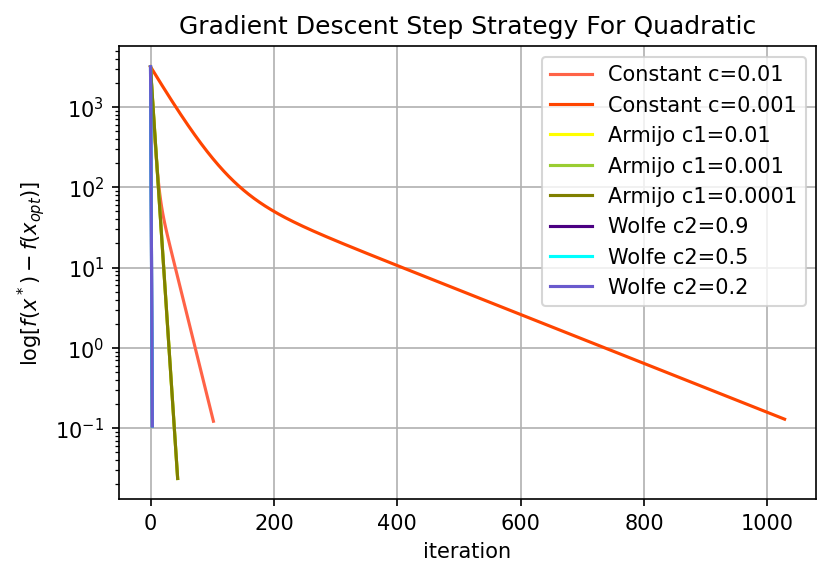

In [32]:
plt.figure(dpi=150)

for i in range(1, len(nev)):
    plt.plot(np.arange(it_quad[i]), np.array(nev[i]), label=names[i], c=colors[i])

plt.xlabel('iteration')
plt.ylabel(r'$\log[f(x^*) - f(x_{opt})]$')
plt.yscale('log')
plt.title('Gradient Descent Step Strategy For Quadratic')
plt.grid()
plt.legend()

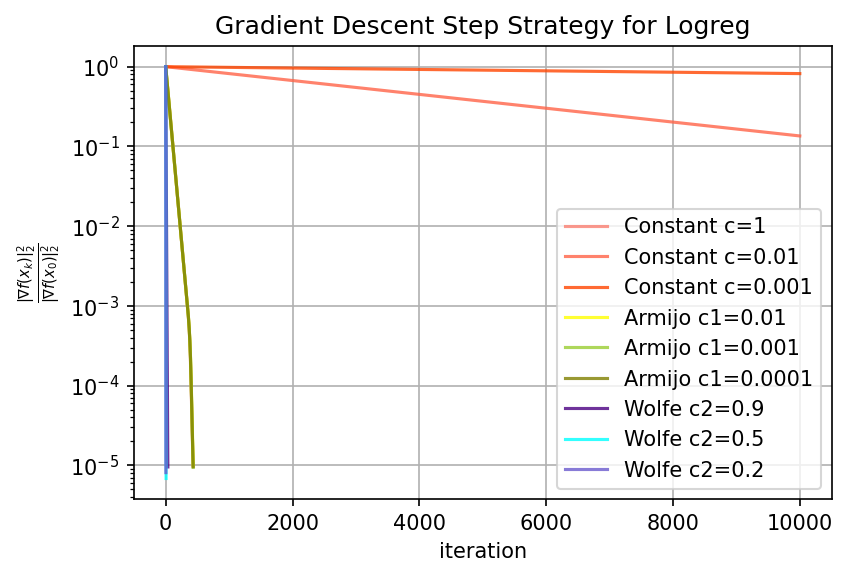

In [33]:
plt.figure(dpi=150)

for i in range(len(nev)):
    plt.plot(np.arange(it_lr[i]), np.array(norm[i]), label=names[i], c=colors[i], alpha=0.8)

plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel(r'$\frac{\left\|\nabla f\left(x_k\right)\right\|_2^2}{\left\|\nabla f\left(x_0\right)\right\|_2^2}$')
plt.title('Gradient Descent Step Strategy for Logreg')
plt.grid()
plt.legend()

### newton

In [301]:
A_quad = np.array([
    [3.5, 0],
    [0, 15]])
b = np.array([0, 0])

oracle_quad = QuadraticOracle(A_quad, b)

A = np.random.rand(5_000, 100)
y = np.sign(np.random.rand(5000))

oracle_lr = create_log_reg_oracle(A, y, regcoef=1 / 100)

nev = []
norm = []
it_quad = []
it_lr = []

for i, ls in enumerate(grid):
    print(ls['method'], i)
    _, s_q, hist_quad = newton(oracle_quad, x_0=[2, 3], line_search_options=ls, trace=True)
    _, s_l, hist_lr = newton(oracle_lr, x_0=np.zeros(100), line_search_options=ls, trace=True)

    print(s_q, s_l, hist_quad['func'][-1])
    nev.append(hist_quad['func'])
    norm.append(hist_lr['norm_to_start'])
    it_quad.append(len(hist_quad['x']))
    it_lr.append(len(hist_lr['x']))

Constant 0
success success 1.4791141972893971e-30
Constant 1
iterations_exceeded iterations_exceeded 9.782854209957504
Constant 2
iterations_exceeded iterations_exceeded 60.86742010990383
Armijo 3
success success 1.4791141972893971e-30
Armijo 4
success success 1.4791141972893971e-30
Armijo 5
success success 1.4791141972893971e-30
Wolfe 6
success success 1.4791141972893971e-30
Wolfe 7
success success 1.4791141972893971e-30
Wolfe 8
success iterations_exceeded 1.4791141972893971e-30


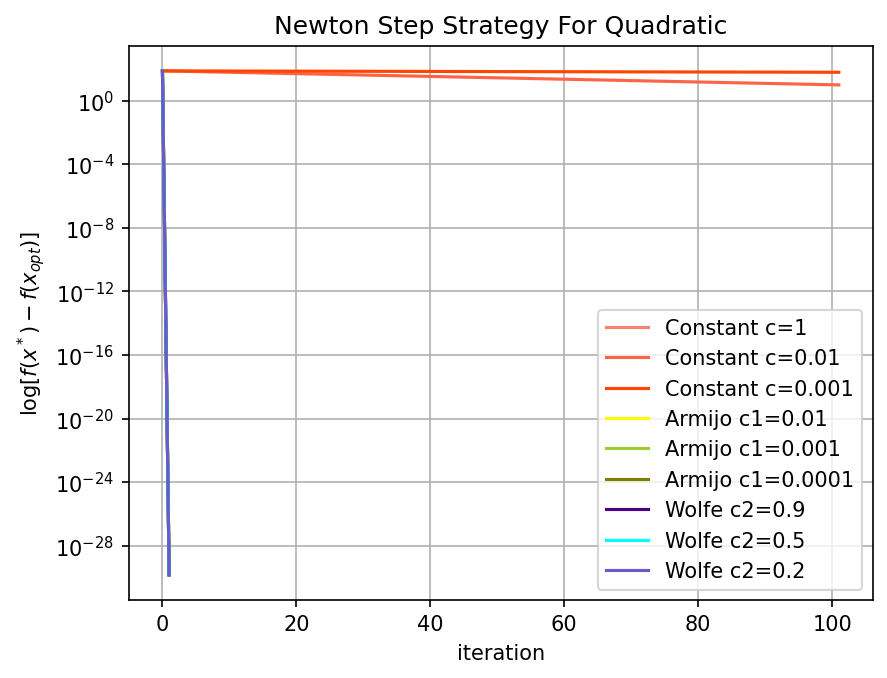

In [302]:
plt.figure(dpi=150)

for i in range(len(nev)):
    plt.plot(np.arange(it_quad[i]), np.array(nev[i]), label=names[i], c=colors[i])

plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel(r'$\log[f(x^*) - f(x_{opt})]$')
plt.title('Newton Step Strategy For Quadratic')
plt.grid()
plt.legend()

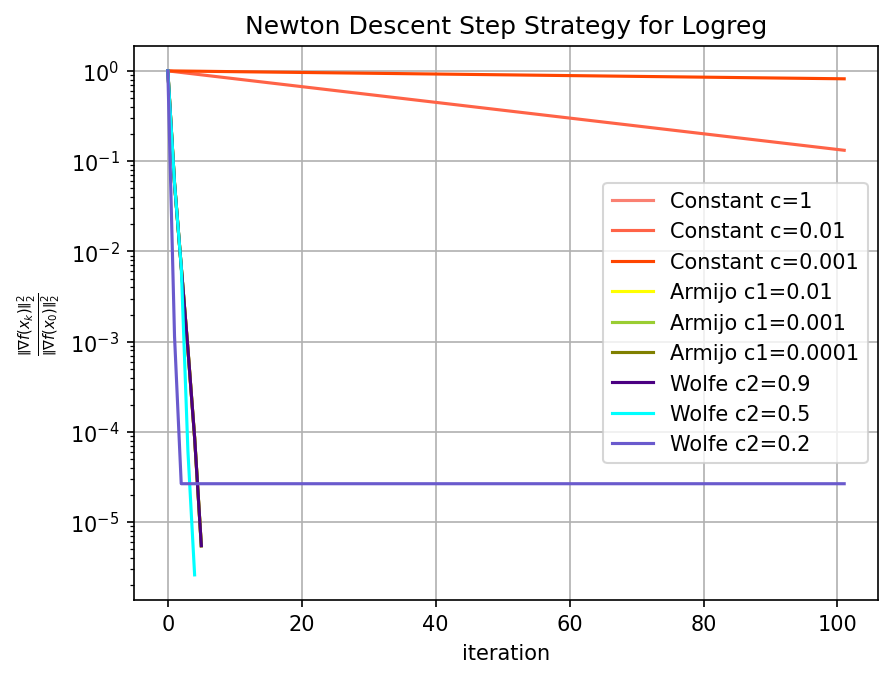

In [304]:
plt.figure(dpi=150)

for i in range(len(nev)):
    plt.plot(np.arange(it_lr[i]), np.array(norm[i]), label=names[i], c=colors[i])

plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel(r'$\frac{\left\|\nabla f\left(x_k\right)\right\|_2^2}{\left\|\nabla f\left(x_0\right)\right\|_2^2}$')
plt.title('Newton Descent Step Strategy for Logreg')
plt.grid()
plt.legend()